In [1]:
#library(rjags)
install.packages('gridExtra')
install.packages('emdbook')

library(tidyverse)
library(gridExtra)
library(emdbook)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




## Ex. 3

In [2]:
n <- 116 #total of sample
y <- 11 #high level of bacteria

(a) find the frequentist estimator for p

In [3]:
p_freq <- 11/116 

cat('the frequenties estimator is:', p_freq)

the frequenties estimator is: 0.09482759

(b) using a Beta(1, 10) prior for p, calculate and plot posterior distribution P (p
∣ y)

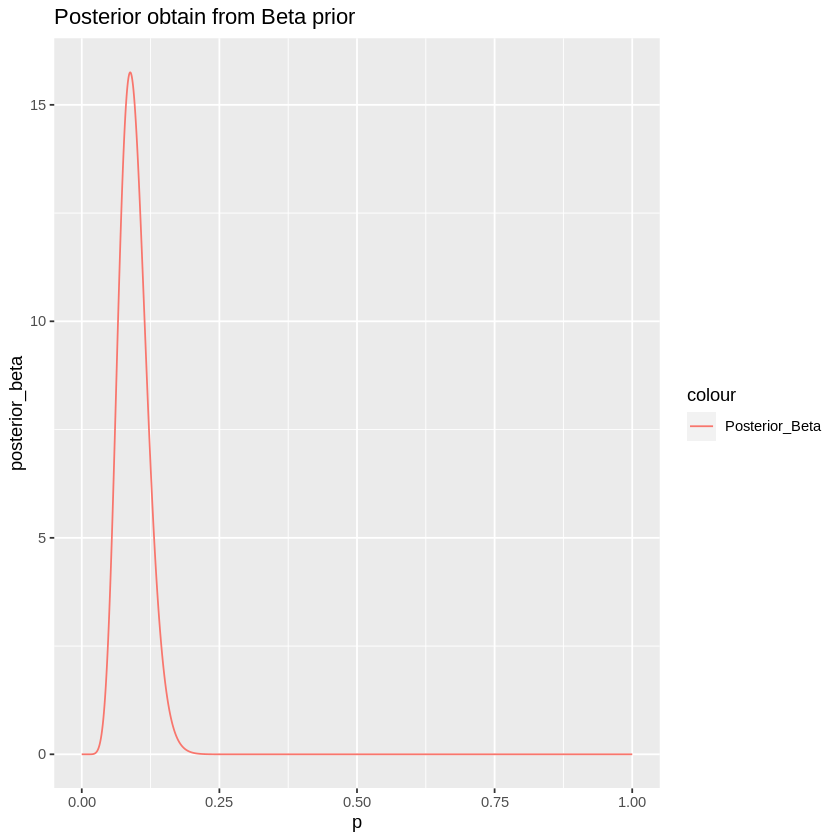

In [4]:
#p and interval
delta.t <- 0.0001
p <- seq(0, 1, by = delta.t) 

#likelihood, Prior
p.like_Beta <- dbinom(y, size=n, prob=p)
p.prior_Beta <- dbeta(p, 1, 10)

#Posterior
p.star_posterior_Beta <- p.like_Beta * p.prior_Beta #mnon normalize Posterior
p.posterior_Beta <- p.star_posterior_Beta/(delta.t * sum(p.star_posterior_Beta)) #normalize posterior

#Plot
ggplot() +
geom_line(aes(x=p, y=p.posterior_Beta, color='Posterior_Beta')) +
labs(x='p', y='posterior_beta', title='Posterior obtain from Beta prior')-> plot_posterior_Beta
plot_posterior_Beta

(c) find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval

Warning message:
“Removed 7000 rows containing missing values (`geom_line()`).”


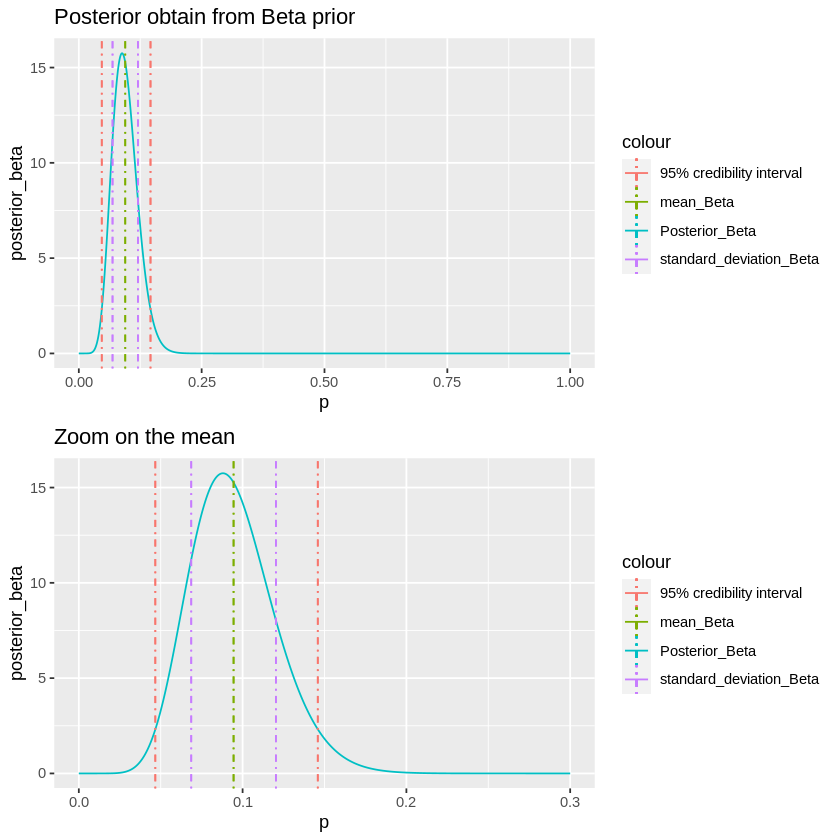

In [6]:
# bayesian estimator for p 

mean_Beta <- (sum(p.posterior_Beta * p)) * delta.t
variance_Beta <- sum(((mean_Beta - p)^2) *p.posterior_Beta) * delta.t
lower_Beta <- ncredint(p, p.posterior_Beta, level=0.95)[['lower']]
upper_Beta <- ncredint(p, p.posterior_Beta, level=0.95)[['upper']]

plot_posterior_Beta + 
geom_vline(aes(xintercept = mean_Beta, color='mean_Beta'), linetype="dotdash") +
geom_vline(aes(xintercept = lower_Beta, color='95% credibility interval'), linetype="dotdash") +
geom_vline(aes(xintercept = upper_Beta, color='95% credibility interval'), linetype="dotdash") +
geom_vline(aes(xintercept = mean_Beta - sqrt(variance_Beta), color='std_Beta'), linetype="dotdash") +
geom_vline(aes(xintercept = mean_Beta + sqrt(variance_Beta), color='std_Beta'), linetype="dotdash") -> plot_posterior_Beta


plot_posterior_Beta + xlim(0, 0.30) + labs(title='Zoom on the mean') -> plot_posterior_Beta_zoom

grid.arrange(grobs=list(plot_posterior_Beta, plot_posterior_Beta_zoom), nrow=2)

(d) test the hypotesis

In [15]:
p_0 <- 0.1
cat('Is p=0.1 inside the 95% credibility interval?', p_0 > lower_Beta & p_0 < upper_Beta,', so I accept the null Hypotesis H_0 and refuse H_1.')

Is p=0.1 is inside the 95% credibility interval? TRUE , so I accept the null Hypotesis H_0 and refuse H_1.

(e) find the frequentist estimator for p

In [16]:
y <- 9
n <- 165

p_freq <- y/n
cat('The frequentiest estimator for p is:', p_freq)

The frequentiest estimator for p is: 0.05454545

(f) find a bayesian estimator for p, assuming both a Beta(1, 10) prior for p, and assuming the posterior
probability of the older measurement as the prior for the new one.

,Mean,Variance,Lower_bound_credibility_interval,Upper_bound_credibility_interval
,<dbl>,<dbl>,<dbl>,<dbl>
Prior: Beta,0.05681818,0.0003027677,0.0251,0.0914
Prior: Old posterior,0.07191781,0.0002278008,0.0436,0.1019


Warning message:
“Removed 7500 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 7500 rows containing missing values (`geom_line()`).”


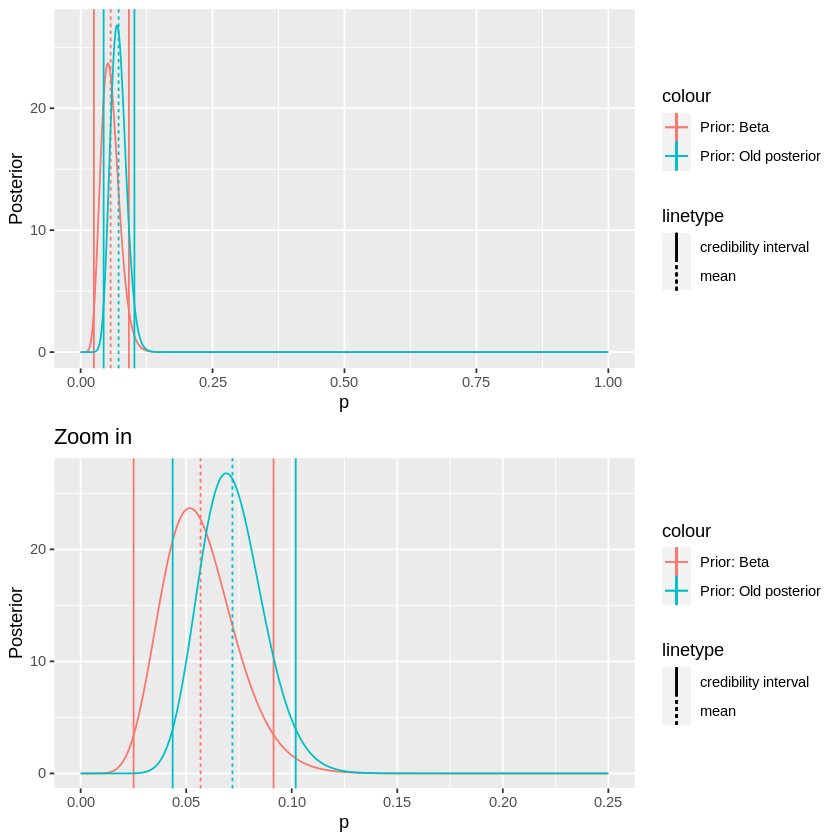

In [57]:
delta.t <- 0.0001
p <- seq(0,1, by=delta.t)

#likelihood
p.like <- dbinom(y, n, prob=p)

#the two prior
p.prior_beta <- dbeta(p, 1, 10)
p.prior_old <- p.posterior_Beta

#the two possible posterior 
p.post_star_beta <- p.like * p.prior_beta #non normalized posterior
p.post_beta <- p.post_star_beta / (delta.t * sum(p.post_star_beta))

p.post_star_old <- p.like * p.prior_old #non normalized posterior
p.post_old <- p.post_star_old / (delta.t * sum(p.post_star_old))

#find the two baiesian estimator for the two posterior 
mean_beta <- sum(p * p.post_beta) * delta.t
variance_beta <- sum(((p-mean_beta)^2) * p.post_beta) * delta.t
lower_Beta <- ncredint(p, p.post_beta, level = 0.95)[['lower']]
upper_Beta <- ncredint(p, p.post_beta, level = 0.95)[['upper']]
credibility_interval_beta <- c(lower_Beta, upper_Beta)


mean_old <- sum(p * p.post_old) * delta.t
variance_old <- sum(((p-mean_old)^2) * p.post_old) * delta.t
lower_old <- ncredint(p, p.post_old, level=0.95)[['lower']]
upper_old <- ncredint(p, p.post_old, level=0.95)[['upper']]
credibility_interval_old <- c(lower_old, upper_old) 

#print the result in a dataframe
result <- data.frame(
          Mean = c(mean_beta, mean_old),
          Variance = c(variance_beta, variance_old),
          Lower_bound_credibility_interval = c(lower_Beta, lower_old),
          Upper_bound_credibility_interval = c(upper_Beta, upper_old),
          row.names = c('Prior: Beta', 'Prior: Old posterior')
)
result

#plot the two posterior 
ggplot()+
geom_line(aes(p, p.post_beta, color='Prior: Beta')) +
geom_vline(aes(xintercept=mean_beta, color = 'Prior: Beta', linetype='mean')) + 
geom_vline(aes(xintercept=lower_Beta, color='Prior: Beta', linetype='credibility interval')) +
geom_vline(aes(xintercept=upper_Beta, color='Prior: Beta', linetype='credibility interval')) +


geom_line(aes(p, p.post_old, color='Prior: Old posterior')) +
geom_vline(aes(xintercept=mean_old, color='Prior: Old posterior', linetype='mean')) +
geom_vline(aes(xintercept=lower_old, color='Prior: Old posterior', linetype='credibility interval')) +
geom_vline(aes(xintercept=upper_old, color='Prior: Old posterior', linetype='credibility interval')) +

labs(x='p', y='Posterior') -> plot_two_prior

plot_two_prior_zoom <- plot_two_prior + xlim(0, 0.25) + labs(title='Zoom in')

grid.arrange(grobs=list(plot_two_prior, plot_two_prior_zoom), nrow=2)


(h) test the hypotesis at $\alpha$=5%

In [60]:
p_0 <- 0.1

cat('Is p = 0.1 inside the credibility interval for the posterior opatined with the Beta prior?', 
   p_0 > lower_Beta & p_0 < upper_Beta, 'so we accept the null hypotesis', '\n')
cat('Is p = 0.1 inside the credibility interval for the posterior opatined with the old posterior as prior?', 
   p_0 > lower_old & p_0 < upper_old, 'so we reject the null hypotesis')


Is p = 0.1 inside the credibility interval for the posterior opatined with the Beta prior? FALSE so we accept the null hypotesis 
Is p = 0.1 inside the credibility interval for the posterior opatined with the old posterior as prior? TRUE so we reject the null hypotesis